In [1]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading in the dataset
dataset = pd.read_csv('diabetes.csv')

In [3]:
#printing top 5
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#inspecting dataset
dataset.shape

(768, 9)

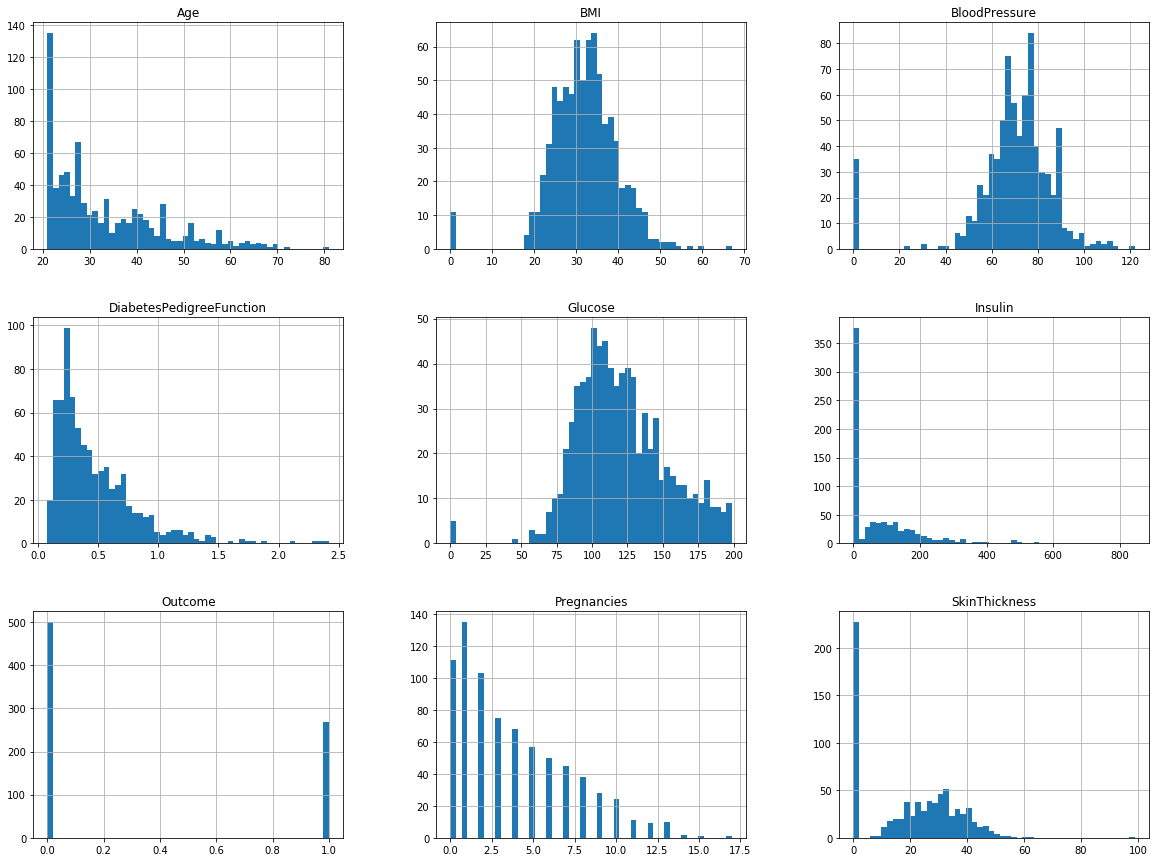

In [5]:
#graphing data
dataset.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#checking for null values(NaN)
dataset.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [8]:
#checking which features are better correlated with the outcome
dataset_corr = dataset.corr() # without "method='pearson'" passed into corr() pearsons is calculated by default
dataset_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


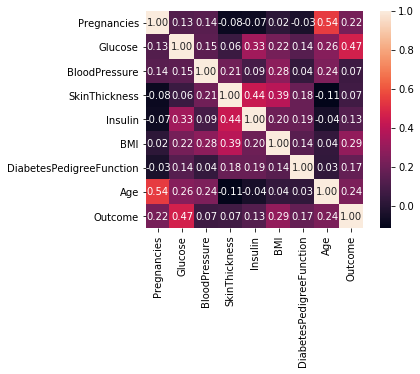

In [19]:
#visualizing correlation matrix
%matplotlib inline
import seaborn as sns
sns.heatmap(dataset_corr,cbar = True, annot = True, square = True, fmt='.2f')

### Data Cleaning and Transformation
It looks impossible that some features such as BMI value, skin thickness, insulin, blood pressure, glucose would be zero. We are going to impute the median for each column and replace every 0 in these columns.

In [11]:
#calculating the median for BMI
median_bmi = dataset['BMI'].median()
dataset['BMI'] = dataset['BMI'].replace(to_replace=0, value=median_bmi)

In [12]:
#calculating the median for BloodPressure
median_bp = dataset['BloodPressure'].median()
dataset['BloodPressure'] = dataset['BloodPressure'].replace(to_replace=0, value=median_bp)

In [13]:
#calculating the median for Plasma Glucose Concentration
median_glu = dataset['Glucose'].median()
dataset['Glucose'] = dataset['Glucose'].replace(to_replace=0, value=median_glu)

In [14]:
#calculating the median for Skin Thickness
median_skin = dataset['SkinThickness'].median()
dataset['SkinThickness'] = dataset['SkinThickness'].replace(to_replace=0, value=median_skin)

In [15]:
#calculating the median for Insulin
median_insu = dataset['Insulin'].median()
dataset['Insulin'] = dataset['Insulin'].replace(to_replace=0, value=median_insu)

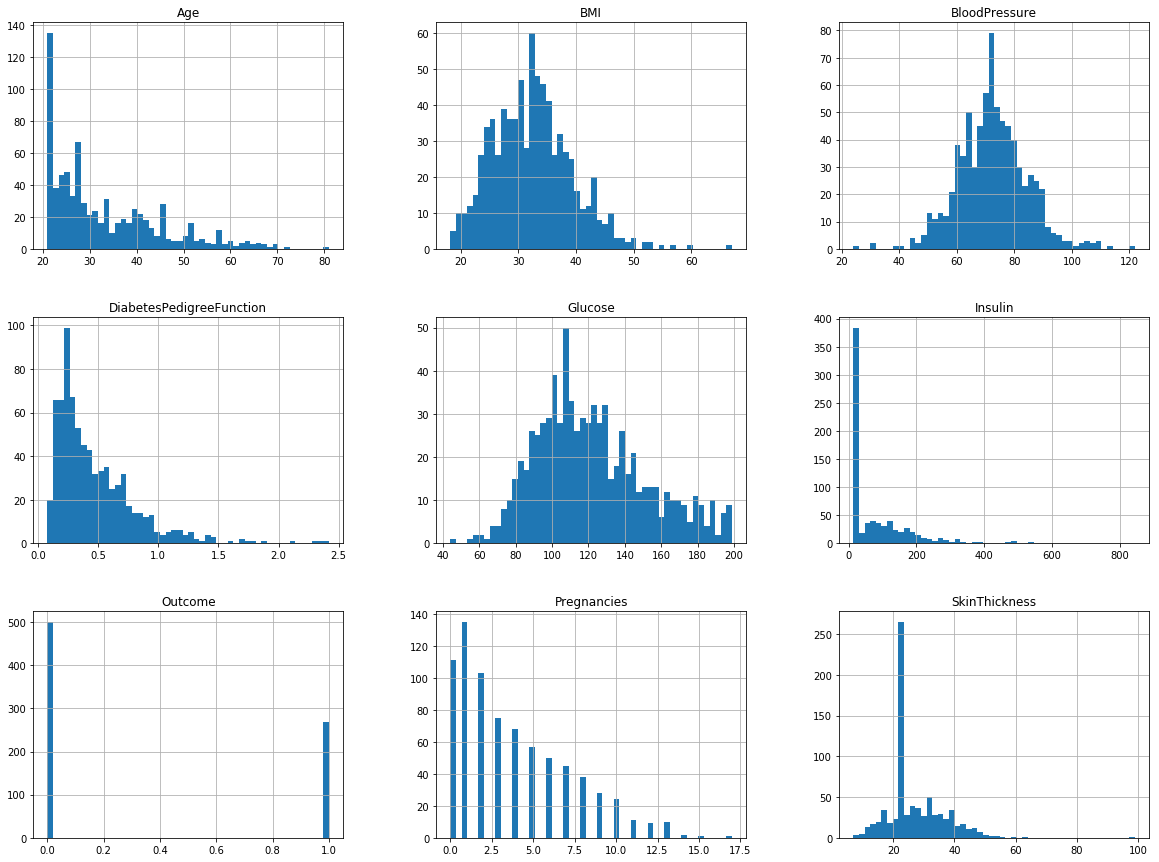

In [16]:
#graphing data after data cleaning
dataset.hist(bins=50, figsize=(20,15))
plt.show()

In [17]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Separating Labels from Rest of Dataset

In [20]:
y = dataset['Outcome'].copy()
X = dataset.drop('Outcome', axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [19]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [27]:
#applying a scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [28]:
scaled_df = pd.DataFrame(data = X_scaled)
scaled_df.head()

,0,1,2,3,4,5,6,7
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


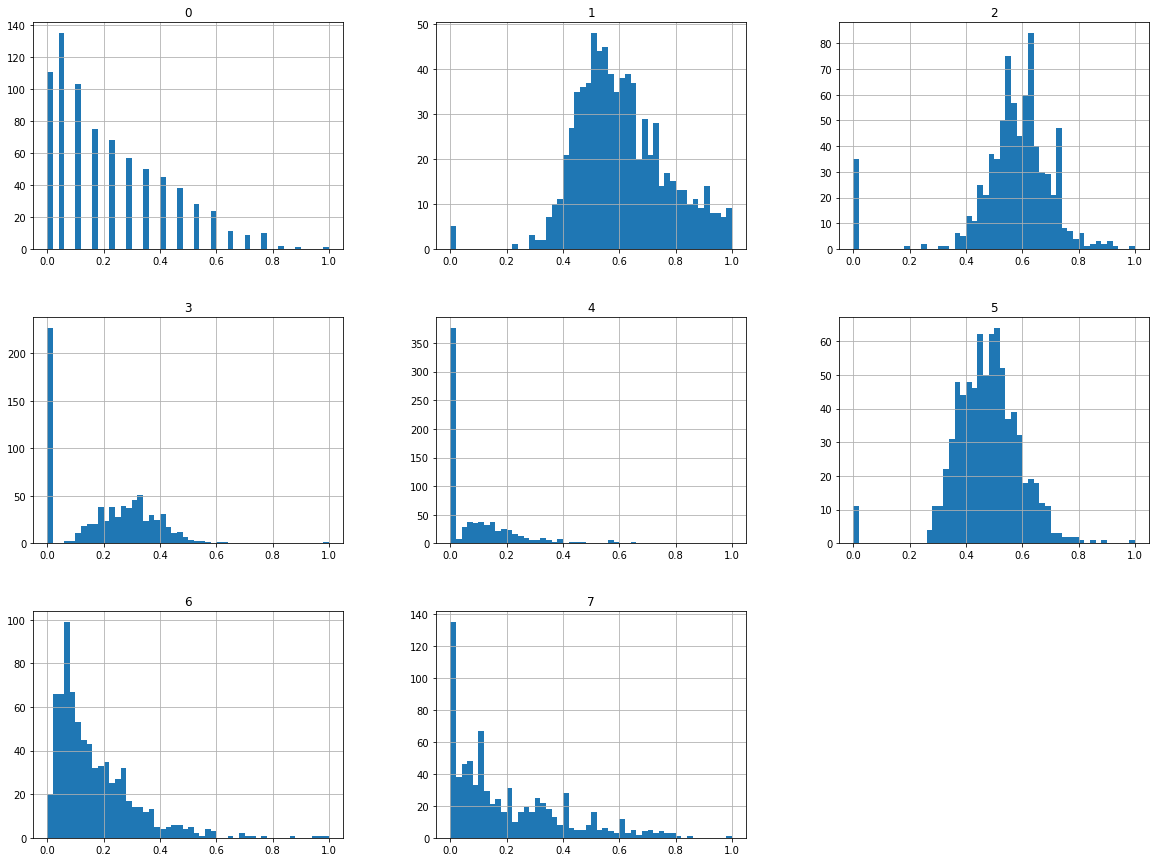

In [29]:
#graphing data after scaling
scaled_df.hist(bins=50, figsize=(20,15))
plt.show()

### Model Selection

In [30]:
#import all algorithms needed
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

In [31]:
#model selection would help us test multiple algorithms on the same dataset.
from sklearn import model_selection 

In [32]:
#array of models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('LSVC', LinearSVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DTR', DecisionTreeRegressor()))

In [33]:
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='warn', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform')),
 ('GNB', GaussianNB(priors=None, var_smoothing=1e-09)),
 ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
      kernel='rbf', max_iter=-1, probability=False, random_state=None,
      shrinking=True, tol=0.001, verbose=False)),
 ('LSVC', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
            intercept_scaling=1, loss='squared_hinge', max_

In [34]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [40]:
names=[]
results=[]

# Every algorithm is tested and results are
# collected and printed
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cv_results = model_selection.cross_val_score(model, X_scaled, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.761740 (0.052185)
KNN: 0.744754 (0.060567)
GNB: 0.755178 (0.042766)
SVC: 0.763004 (0.056922)
LSVC: 0.772163 (0.049933)
RFC: 0.739525 (0.066974)
DTR: 0.690055 (0.057993)


In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [1.0, 10.0, 50.0],
    'loss': ['hinge', 'squared_hinge'],
    'multi_class': ['ovr','crammer_singer']
}

lsvc = LinearSVC()

grid_search = GridSearchCV(lsvc, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_scaled, y)


GridSearchCV(cv=10, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1.0, 10.0, 50.0], 'loss': ['hinge', 'squared_hinge'], 'multi_class': ['ovr', 'crammer_singer']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [31]:
# Print the bext score found
grid_search.best_score_

0.77083333333333337

In [32]:
# Print the bext estimator combination found
grid_search.best_estimator_

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

### Applying best parameters to model

In [34]:
# Create an instance of the algorithm using parameters
# from best_estimator_ property
svc = grid_search.best_estimator_

# Train the model
svc.fit(X_scaled, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

### Prediction

In [36]:
# We create a new (fake) person having the three most correlated values high and another having lower values.
new_df = pd.DataFrame([[6, 168, 72, 35, 0, 43.6, 0.627, 65],[0, 95, 80, 35, 100, 25, 0.5, 23]])
# We scale those values like the others
new_df_scaled = scaler.transform(new_df)

# We predict the outcome
prediction = svc.predict(new_df_scaled)

prediction

array([1, 0])